In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("/content/drive/MyDrive/AI Quest/Assignment-15/uci breast cancer dataset.csv")

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df = df.drop(["id", "Unnamed: 32"], axis = 1)

In [7]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#**Seperating "x" and "y"**

In [8]:
x = df.drop("diagnosis", axis = 1)

In [9]:
y = df["diagnosis"]

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state = 42)

#**Applying XGBoost classifier**

In [12]:
from xgboost import XGBClassifier

In [13]:
xgb = XGBClassifier()

In [14]:
xgb.fit(xtrain, ytrain)

XGBClassifier()

In [15]:
xgb.score(xtest, ytest)

0.965034965034965

In [16]:
ypred = xgb.predict(xtest)
ypred

array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'B'],
      dtype=object)

In [17]:
np.array(ytest)

array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B'],
      dtype=object)

#**Evaluating the ML model**

In [18]:
from sklearn.metrics import classification_report , accuracy_score, confusion_matrix, plot_roc_curve

In [19]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           B       0.97      0.98      0.97        89
           M       0.96      0.94      0.95        54

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



In [20]:
tp, fn, fp, tn = confusion_matrix(ytest, ypred).reshape(-1)

In [21]:
print(f"True positive: {tp}, True Negative: {tn}, False Positive: {fp}, False Negative: {fn}")

True positive: 87, True Negative: 51, False Positive: 3, False Negative: 2


In [22]:
cm = confusion_matrix(ytest, ypred)

In [23]:
cm

array([[87,  2],
       [ 3, 51]])

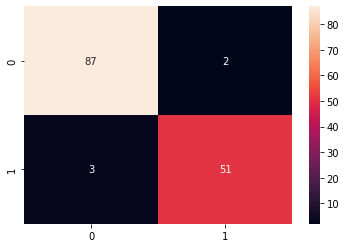

In [24]:
sns.heatmap(cm, annot = True)

#**Hyperparameter tuning using RandomizedSearchCV**

In [25]:
from sklearn.model_selection import RandomizedSearchCV

In [26]:
params = {"learning_rate": [0.05, 0.10, 0.15, 0.20, 0.25, 0.30], "max_depth": [ 3, 4, 5, 6, 8, 10, 12, 15], "min_child_weight": [ 1, 3, 5, 7], "gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4], "colsample_bytree": [ 0.3, 0.4, 0.5 , 0.7]}

In [27]:
rcv_xgb = RandomizedSearchCV(XGBClassifier(), params, cv = 3, return_train_score = True, verbose = 1, scoring = "accuracy", random_state = 1)

In [28]:
rcv_xgb.fit(xtrain, ytrain)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=XGBClassifier(),
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   random_state=1, return_train_score=True, scoring='accuracy',
                   verbose=1)

In [29]:
rcv_xgb.score(xtest, ytest)

0.972027972027972

In [30]:
rcv_xgb.cv_results_

{'mean_fit_time': array([0.03090286, 0.02334698, 0.03244837, 0.02580086, 0.02454615,
        0.0235339 , 0.03590918, 0.03693422, 0.03933835, 0.02906847]),
 'std_fit_time': array([0.00608117, 0.00026639, 0.0022449 , 0.0022118 , 0.00027781,
        0.00041407, 0.00091867, 0.00042768, 0.00074504, 0.00032368]),
 'mean_score_time': array([0.00214799, 0.0019927 , 0.00216317, 0.00223446, 0.00199906,
        0.00191482, 0.00202489, 0.00200939, 0.00254107, 0.00233229]),
 'std_score_time': array([3.52452949e-05, 3.90793192e-06, 4.31192815e-05, 4.16669511e-04,
        4.48836651e-05, 4.38950699e-05, 5.71578398e-05, 1.05677987e-05,
        2.56624423e-04, 3.18202105e-04]),
 'param_min_child_weight': masked_array(data=[3, 7, 1, 7, 3, 7, 3, 7, 1, 1],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[4, 5, 5, 15, 5, 5, 4, 6, 3, 8],
              mask=

In [31]:
tuning_result = pd.DataFrame(rcv_xgb.cv_results_)

In [32]:
tuning_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_child_weight,param_max_depth,param_learning_rate,param_gamma,param_colsample_bytree,params,...,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.030903,0.006081,0.002148,0.000035,3,4,0.2,0.0,0.4,"{'min_child_weight': 3, 'max_depth': 4, 'learn...",...,0.971831,0.957746,0.964789,0.005750,4,0.996479,0.996479,0.996479,0.996479,0.000000
1,0.023347,0.000266,0.001993,0.000004,7,5,0.1,0.1,0.3,"{'min_child_weight': 7, 'max_depth': 5, 'learn...",...,0.957746,0.957746,0.955399,0.003320,7,0.982394,0.982394,0.985915,0.983568,0.001660
2,0.032448,0.002245,0.002163,0.000043,1,5,0.25,0.0,0.4,"{'min_child_weight': 1, 'max_depth': 5, 'learn...",...,0.971831,0.950704,0.967136,0.011970,2,1.000000,1.000000,1.000000,1.000000,0.000000
3,0.025801,0.002212,0.002234,0.000417,7,15,0.3,0.4,0.7,"{'min_child_weight': 7, 'max_depth': 15, 'lear...",...,0.943662,0.950704,0.941315,0.008783,10,0.978873,0.982394,0.989437,0.983568,0.004392
4,0.024546,0.000278,0.001999,0.000045,3,5,0.25,0.4,0.3,"{'min_child_weight': 3, 'max_depth': 5, 'learn...",...,0.978873,0.957746,0.967136,0.008783,2,0.992958,0.996479,0.996479,0.995305,0.001660
5,0.023534,0.000414,0.001915,0.000044,7,5,0.15,0.4,0.5,"{'min_child_weight': 7, 'max_depth': 5, 'learn...",...,0.950704,0.957746,0.950704,0.005750,8,0.975352,0.982394,0.985915,0.981221,0.004392
6,0.035909,0.000919,0.002025,0.000057,3,4,0.15,0.4,0.7,"{'min_child_weight': 3, 'max_depth': 4, 'learn...",...,0.964789,0.950704,0.960094,0.006640,5,0.996479,0.992958,0.996479,0.995305,0.001660
7,0.036934,0.000428,0.002009,0.000011,7,6,0.05,0.0,0.7,"{'min_child_weight': 7, 'max_depth': 6, 'learn...",...,0.943662,0.950704,0.946009,0.003320,9,0.975352,0.985915,0.985915,0.982394,0.004980
8,0.039338,0.000745,0.002541,0.000257,1,3,0.05,0.0,0.4,"{'min_child_weight': 1, 'max_depth': 3, 'learn...",...,0.964789,0.950704,0.960094,0.006640,5,0.996479,0.996479,1.000000,0.997653,0.001660
9,0.029068,0.000324,0.002332,0.000318,1,8,0.25,0.0,0.3,"{'min_child_weight': 1, 'max_depth': 8, 'learn...",...,0.978873,0.964789,0.969484,0.006640,1,1.000000,1.000000,1.000000,1.000000,0.000000


In [33]:
rcv_xgb.best_score_

0.9694835680751174

In [34]:
rcv_xgb.best_params_

{'min_child_weight': 1,
 'max_depth': 8,
 'learning_rate': 0.25,
 'gamma': 0.0,
 'colsample_bytree': 0.3}

In [35]:
est = rcv_xgb.best_estimator_

In [36]:
est.fit(xtrain, ytrain)

XGBClassifier(colsample_bytree=0.3, gamma=0.0, learning_rate=0.25, max_depth=8)

In [37]:
est.score(xtest, ytest)

0.972027972027972